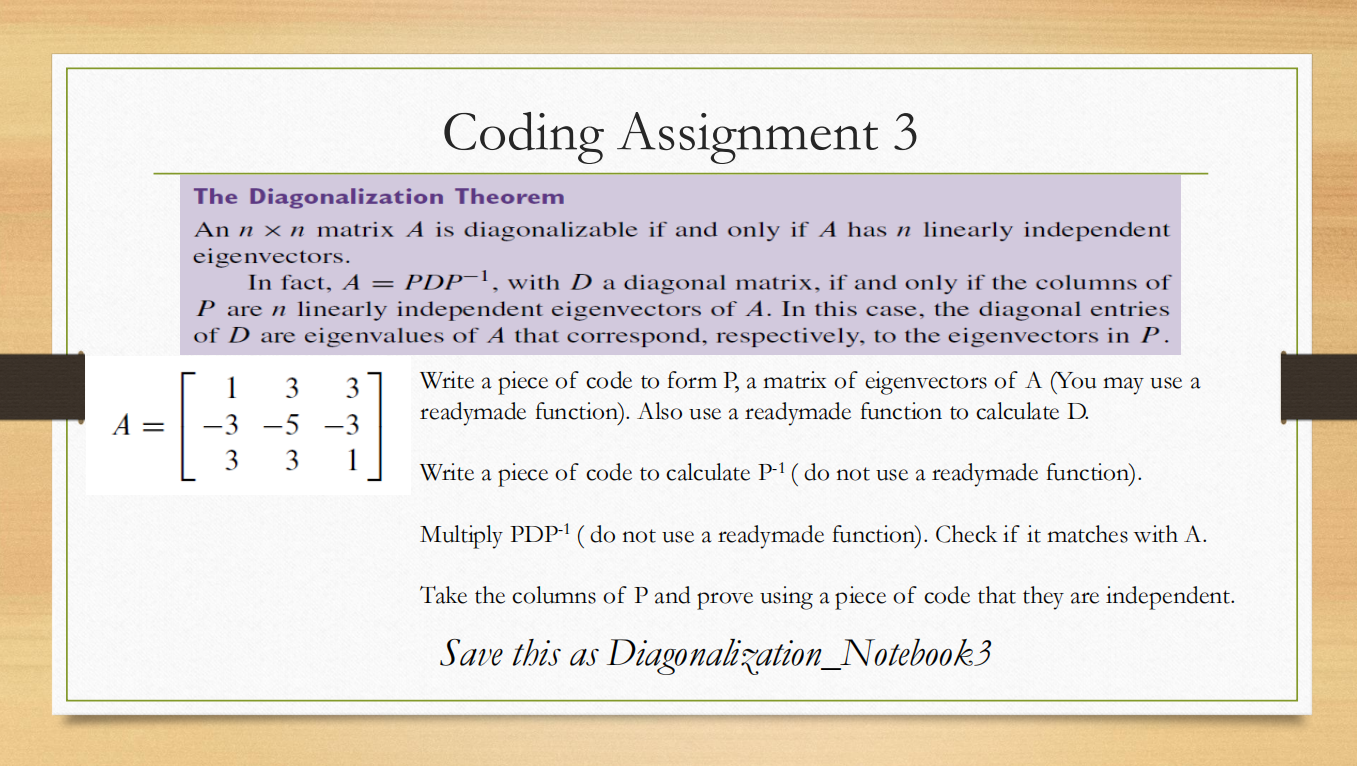

In [1]:
import numpy as np
A = np.array([[1,3,3],
              [-3,-5,-3],
              [3,3,1]])

### Question 1: Write a piece of code to form P, a matrix of eigenvectors of A (You may use a readymade function) Also use a readymade function to calculate D

In [2]:
def formPD(matrix):
    eigen_values,eigen_vectors = np.linalg.eig(matrix)
    return eigen_vectors,np.diag(eigen_values)

In [3]:
P,D = formPD(A)
P = np.array(P)
D=np.array(D)
print("P:",P)
print("D:",D)

P: [[-0.57735027 -0.78762616  0.42064462]
 [ 0.57735027  0.20744308 -0.81636981]
 [-0.57735027  0.58018308  0.3957252 ]]
D: [[ 1.  0.  0.]
 [ 0. -2.  0.]
 [ 0.  0. -2.]]


### Question 2: Write a piece of code to calculate P-1 ( do not use a readymade function)

In [4]:
def calculate_Pinv(matrix):
   n = len(matrix)
   augmented_matrix = np.hstack((matrix, np.identity(n))) #Takes only one argument. 
   for i in range(n): # For each row in the augmented matrix
        # Partial pivoting
        max_row = i #Indicates the current row here , it may be 0,1,2 row
        for k in range(i+1, n): # Indicates the rows after the current row , for example if current row is 0 then k value will be 1,2
            if abs(augmented_matrix[k][i]) > abs(augmented_matrix[max_row][i]): #find the pivot element (which is the largest element)
                max_row = k
        augmented_matrix[[i, max_row]] = augmented_matrix[[max_row, i]] #Swapping

        # Make the diagonal element 1
        divisor = augmented_matrix[i][i]#fetching the diagonals like matrix[1,1],matrix[2,2],matrix[3,3]
        augmented_matrix[i] /= divisor #Divede the entire current row with the diagonal value

        # Make other elements in the current column zero
        for k in range(n):
            if k != i: #Rows other than the current one
                factor = augmented_matrix[k][i] #Extracting the element which you want to make it as zero
                augmented_matrix[k] -= factor * augmented_matrix[i] # Perfoming the opertion on the entire row

   inverse_matrix = augmented_matrix[:, n:]

   # Print the inverse matrix
   print("Inverse of A:")
   print(inverse_matrix)
    
   #Return Matrix
   return inverse_matrix


In [5]:
P_inv=calculate_Pinv(P)

Inverse of A:
[[-1.73205081 -1.73205081 -1.73205081]
 [-0.75691664 -0.04484052  0.71207612]
 [-1.41727082 -2.46126427 -1.04399344]]


### Quesstion 3: Multiply PDP-1 ( do not use a readymade function). Check if it matches with A

In [6]:
def matrix_multiply(A,B):
    n = len(A)
    result = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            for k in range(n):
                result[i][j]+=A[i][k]*B[k][j]
                
    return result           

In [7]:
PD = matrix_multiply(P,D)
PDPinv = matrix_multiply(PD,P_inv)
print("PDP^-1:",PDPinv)

PDP^-1: [[ 1.  3.  3.]
 [-3. -5. -3.]
 [ 3.  3.  1.]]


In [14]:
tolerance = 1e-2
all_elements_equal =  np.allclose(A, PDPinv, atol=tolerance)
print("A and PDP^-1 are equal:",all_elements_equal)

A and PDP^-1 are equal: True


### Take the columns of P and prove using a piece of code that they are independent

In [15]:
# Check the rank of the matrix
rank = np.linalg.matrix_rank(P)
print("Rank of the matrix P:", rank)

# Number of columns
num_columns = P.shape[1]
print("Number of columns in P:", num_columns)

# Check if the rank is equal to the number of columns
if rank == num_columns:
    print("The columns of P are linearly independent.")
else:
    print("The columns of P are not linearly independent.")


Rank of the matrix P: 3
Number of columns in P: 3
The columns of P are linearly independent.
